# Prototype for Final Year Project (Phishing)

In [1]:
'''imports'''
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
'''to remove warnings'''
import warnings
warnings.filterwarnings("ignore")

# Importing Data

In [3]:
data1 = pd.read_csv('CSV/phishing_dataset_4.csv')

In [4]:
data2 = pd.read_csv('CSV/non_phishing_dataset_4.csv')

In [5]:
frames = [data1, data2]
data = pd.concat(frames)

In [6]:
data

,SenderReplyDiff,checkAttachments,subjReply,subjForward,subjNoOfWords,subjNoOfChar,subjVerify,subjDebit,subjBank,script_exist,...,check_suspend,check_verify,noOfURLs,noOfLinks,checkIP,checkAtSym,checkURLShorten,checkImg,checkPort,Phishing
0,0,0,True,False,8,50,False,False,False,False,...,False,False,1,0,1,1,1,0,1,1
1,1,0,False,False,4,23,False,False,False,False,...,False,False,4,2,1,1,1,2,1,1
2,1,1,False,False,6,41,False,False,False,False,...,False,False,11,10,1,0,1,14,1,1
3,1,0,False,False,6,41,False,False,False,False,...,False,True,0,1,1,1,1,0,1,1
4,1,0,False,False,4,34,False,False,False,False,...,False,False,2,3,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,1,0,False,False,5,38,False,False,False,False,...,False,False,1,0,1,1,1,0,1,0
2183,1,0,False,False,4,32,False,False,False,False,...,False,False,1,0,1,1,1,0,1,0
2184,1,0,False,False,6,39,False,False,False,False,...,False,False,1,0,1,1,1,0,1,0
2185,1,0,False,False,4,34,False,False,False,False,...,False,False,1,0,1,1,1,0,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2677 entries, 0 to 2186
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SenderReplyDiff   2677 non-null   int64  
 1   checkAttachments  2677 non-null   int64  
 2   subjReply         2677 non-null   bool   
 3   subjForward       2677 non-null   bool   
 4   subjNoOfWords     2677 non-null   int64  
 5   subjNoOfChar      2677 non-null   int64  
 6   subjVerify        2677 non-null   bool   
 7   subjDebit         2677 non-null   bool   
 8   subjBank          2677 non-null   bool   
 9   script_exist      2677 non-null   bool   
 10  checkPopup        2677 non-null   int64  
 11  checkJS           2677 non-null   int64  
 12  NoOnClick         2677 non-null   int64  
 13  html_exist        2677 non-null   bool   
 14  form_exist        2677 non-null   bool   
 15  noFunctionWords   2677 non-null   int64  
 16  avgDomainLength   2677 non-null   float64


# Data Preparation

features_list ['SenderReplyDiff','checkAttachments','subjReply','subjForward','subjNoOfWords','subjNoOfChar','subjVerify','subjDebit',
                 'subjBank','script_exist','checkPopup','checkJS','NoOnClick','html_exist','form_exist','noFunctionWords',
                 'noWords','check_suspend','check_verify','noOfURLs','noOfLinks','checkIP','checkAtSym','checkdoubleslash',
                 'checkURLShorten','checkImg','checkPort']

features_list = ['SenderReplyDiff','checkAttachments','subjReply','subjForward','subjNoOfWords','subjNoOfChar','subjVerify','subjDebit',
                 'subjBank','script_exist','checkPopup','checkJS','NoOnClick','html_exist','form_exist','noFunctionWords',
                 'noWords','noChars','check_suspend','check_verify','check_dear','unique_Words','Richness','noOfURLs','noOfLinks','checkIP','checkAtSym','checkdoubleslash',
                 'checkURLShorten','checkImg','checkPort','checkNoDots','avg_DomainLength','checkContentURL','checkModal','check_Here']

In [8]:
variables = ['SenderReplyDiff','checkAttachments','subjReply','subjForward','subjNoOfWords','subjNoOfChar','subjVerify','subjDebit',
                 'subjBank','script_exist','checkPopup','checkJS','NoOnClick','html_exist','form_exist','noFunctionWords','avgDomainLength',
                 'noWords','check_suspend','check_verify','noOfURLs','noOfLinks','checkIP','checkAtSym', 
                 'checkURLShorten','checkImg','checkPort']

X = data[variables]
y = data['Phishing']

In [9]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X.subjReply = enc.fit_transform(X.subjReply.values.reshape(-1,1))
X.subjForward = enc.fit_transform(X.subjForward.values.reshape(-1,1))
X.subjVerify = enc.fit_transform(X.subjVerify.values.reshape(-1,1))
X.subjDebit = enc.fit_transform(X.subjDebit.values.reshape(-1,1))
X.subjBank = enc.fit_transform(X.subjBank.values.reshape(-1,1))
X.script_exist = enc.fit_transform(X.script_exist.values.reshape(-1,1))
X.check_suspend = enc.fit_transform(X.check_suspend.values.reshape(-1,1))
X.check_verify = enc.fit_transform(X.check_verify.values.reshape(-1,1))
X.html_exist = enc.fit_transform(X.html_exist.values.reshape(-1,1))
X.form_exist = enc.fit_transform(X.form_exist.values.reshape(-1,1))

In [10]:
X.head()

,SenderReplyDiff,checkAttachments,subjReply,subjForward,subjNoOfWords,subjNoOfChar,subjVerify,subjDebit,subjBank,script_exist,...,noWords,check_suspend,check_verify,noOfURLs,noOfLinks,checkIP,checkAtSym,checkURLShorten,checkImg,checkPort
0,0,0,1.0,0.0,8,50,0.0,0.0,0.0,0.0,...,57,0.0,0.0,1,0,1,1,1,0,1
1,1,0,0.0,0.0,4,23,0.0,0.0,0.0,0.0,...,317,0.0,0.0,4,2,1,1,1,2,1
2,1,1,0.0,0.0,6,41,0.0,0.0,0.0,0.0,...,1299,0.0,0.0,11,10,1,0,1,14,1
3,1,0,0.0,0.0,6,41,0.0,0.0,0.0,0.0,...,691,0.0,1.0,0,1,1,1,1,0,1
4,1,0,0.0,0.0,4,34,0.0,0.0,0.0,0.0,...,487,0.0,0.0,2,3,1,0,1,0,1


In [11]:
X.loc[ X['noOfURLs'] <= 1, 'noOfURLs'] = 0
X.loc[(X['noOfURLs'] > 1)  & (X['noOfURLs'] <= 2), 'noOfURLs'] = 1
X.loc[(X['noOfURLs'] > 2)  & (X['noOfURLs'] <= 3), 'noOfURLs'] = 2
X.loc[(X['noOfURLs'] > 3)  & (X['noOfURLs'] <= 6), 'noOfURLs'] = 3
X.loc[(X['noOfURLs'] > 6)  & (X['noOfURLs'] <= 12), 'noOfURLs'] = 4
X.loc[(X['noOfURLs'] > 12)  & (X['noOfURLs'] <= 33), 'noOfURLs'] = 5
X.loc[ X['noOfURLs'] > 33, 'noOfURLs'] = 6

In [12]:
X.loc[ X['noOfLinks'] <= 0, 'noOfLinks'] = 0
X.loc[ X['noOfLinks'] > 0, 'noOfLinks'] = 1

In [13]:
X.loc[ X['noWords'] <= 361.867, 'noWords'] = 0
X.loc[(X['noWords'] > 361.867)  & (X['noWords'] <= 651.4), 'noWords'] = 1
X.loc[ X['noWords'] > 651.4, 'noWords'] = 2

In [14]:
X.loc[ X['subjNoOfChar'] <= 26.0, 'subjNoOfChar'] = 0
X.loc[(X['subjNoOfChar'] > 26.0)  & (X['subjNoOfChar'] <= 41.0), 'subjNoOfChar'] = 1
X.loc[ X['subjNoOfChar'] > 41.0, 'subjNoOfChar'] = 2

In [15]:
X.loc[ X['subjNoOfWords'] <= 3, 'subjNoOfWords'] = 0
X.loc[(X['subjNoOfWords'] > 3)  & (X['subjNoOfWords'] <= 6), 'subjNoOfWords'] = 1
X.loc[(X['subjNoOfWords'] > 6)  & (X['subjNoOfWords'] <= 10), 'subjNoOfWords'] = 2
X.loc[ X['subjNoOfWords'] > 10, 'subjNoOfWords'] = 3

In [16]:
X.loc[ X['avgDomainLength'] <= 0, 'avgDomainLength'] = 0
X.loc[(X['avgDomainLength'] > 0)  & (X['avgDomainLength'] <= 16), 'avgDomainLength'] = 1
X.loc[(X['avgDomainLength'] > 16)  & (X['avgDomainLength'] <= 30), 'avgDomainLength'] = 2
X.loc[(X['avgDomainLength'] > 30)  & (X['avgDomainLength'] <= 40), 'avgDomainLength'] = 3
X.loc[(X['avgDomainLength'] > 40)  & (X['avgDomainLength'] <= 53), 'avgDomainLength'] = 4
X.loc[ X['avgDomainLength'] > 53, 'avgDomainLength'] = 5

In [17]:
X.loc[ X['checkImg'] <= 0, 'checkImg'] = 0
X.loc[(X['checkImg'] > 0), 'checkImg'] = 1

In [18]:
X.loc[ X['noFunctionWords'] <= 3.0, 'noFunctionWords'] = 0
X.loc[(X['noFunctionWords'] > 3.0), 'noFunctionWords'] = 1

In [19]:
X.loc[ X['NoOnClick'] <= 0, 'NoOnClick'] = 0
X.loc[(X['NoOnClick'] > 0), 'NoOnClick'] = 1

In [20]:
X.head()

,SenderReplyDiff,checkAttachments,subjReply,subjForward,subjNoOfWords,subjNoOfChar,subjVerify,subjDebit,subjBank,script_exist,...,noWords,check_suspend,check_verify,noOfURLs,noOfLinks,checkIP,checkAtSym,checkURLShorten,checkImg,checkPort
0,0,0,1.0,0.0,2,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,1,1,1,0,1
1,1,0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,3,1,1,1,1,1,1
2,1,1,0.0,0.0,1,1,0.0,0.0,0.0,0.0,...,2,0.0,0.0,4,1,1,0,1,1,1
3,1,0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,...,2,0.0,1.0,0,1,1,1,1,0,1
4,1,0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,...,1,0.0,0.0,1,1,1,0,1,0,1


# Training and Saving the Model

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [23]:
'''Saving and then loading the model using pickle'''
import pickle
#pickle.dump(model, open("phishing_trained_model_2.p", "wb"))
model = pickle.load(open("phishing_trained_model_2.p", "rb"))

# Feature Importance

In [24]:
y_hat = model.predict(X_test)

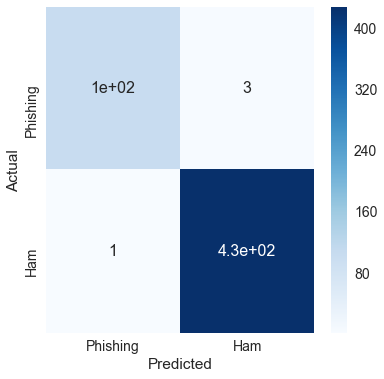

In [25]:
'''Printing of confusion matrix'''
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Phishing","Ham"]
'''Create confusion matrix'''
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
sns.set(font_scale=1.4)#for label size
'''View data with seaborn heatmap'''
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [26]:
'''Printing of accuracy score'''
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_hat))

Accuracy:  0.9925373134328358


In [27]:
features_list = ['SenderReplyDiff','checkAttachments','subjReply','subjForward','subjNoOfWords','subjNoOfChar','subjVerify','subjDebit',
                 'subjBank','script_exist','checkPopup','checkJS','NoOnClick','html_exist','form_exist','noFunctionWords','avgDomainLength',
                 'noWords','check_suspend','check_verify','noOfURLs','noOfLinks','checkIP','checkAtSym', 
                 'checkURLShorten','checkImg','checkPort']

In [28]:
feature = model.feature_importances_
ranking = np.argsort(-model.feature_importances_[:40])
for x in range(0,len(features_list)):
    y = ranking[x]
    print("{}".format(features_list[y]),": {}".format(feature[y]*100))

noOfLinks : 74.4754869849643
checkAttachments : 18.214021293920528
html_exist : 1.5287186894256355
noFunctionWords : 1.3181609670966359
subjReply : 1.2791960079419382
SenderReplyDiff : 0.7434940746636622
subjNoOfWords : 0.6247905303061865
noWords : 0.491446912371926
checkAtSym : 0.3039005877917884
subjVerify : 0.26313520296869036
subjNoOfChar : 0.22841523260837088
checkImg : 0.19752542889300392
noOfURLs : 0.18646153958345124
avgDomainLength : 0.0804867507503579
check_verify : 0.060088679765389334
script_exist : 0.003382554951204061
checkURLShorten : 0.0009291177370646295
checkJS : 0.00035944425985617894
form_exist : 0.0
checkPopup : 0.0
check_suspend : 0.0
subjBank : 0.0
subjForward : 0.0
checkIP : 0.0
subjDebit : 0.0
NoOnClick : 0.0
checkPort : 0.0


Ideas of Methods Flag could be Distributed:
- Replying to the email that sends a false positive or false negative with flag
- Using a form that only gives flag if the two AIs give different results (false negative, false positive)

In [29]:
data[['checkAttachments', 'Phishing']].groupby(['checkAttachments'], as_index=False).mean()

,checkAttachments,Phishing
0,0,0.139241
1,1,0.926174


In [30]:
data['checkAttachments'] = pd.qcut(data['checkAttachments'], 3, duplicates="drop")
data[['checkAttachments', 'Phishing']].groupby(['checkAttachments'], as_index=False).mean()

,checkAttachments,Phishing
0,"(-0.001, 1.0]",0.183041


In [31]:
data['noFunctionWords'] = pd.qcut(data['noFunctionWords'], 4, duplicates="drop")
data[['noFunctionWords', 'Phishing']].groupby(['noFunctionWords'], as_index=False).mean()

,noFunctionWords,Phishing
0,"(-0.001, 1.0]",0.060384
1,"(1.0, 121.0]",0.729124
